In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv('AmesHousing.txt',sep = '\t')

#Separating rows into the train rows and the test rows
train = data[:1460].copy()
test = data[1460:].copy()
#the target column would be the column "SalePrice"
target = "SalePrice"

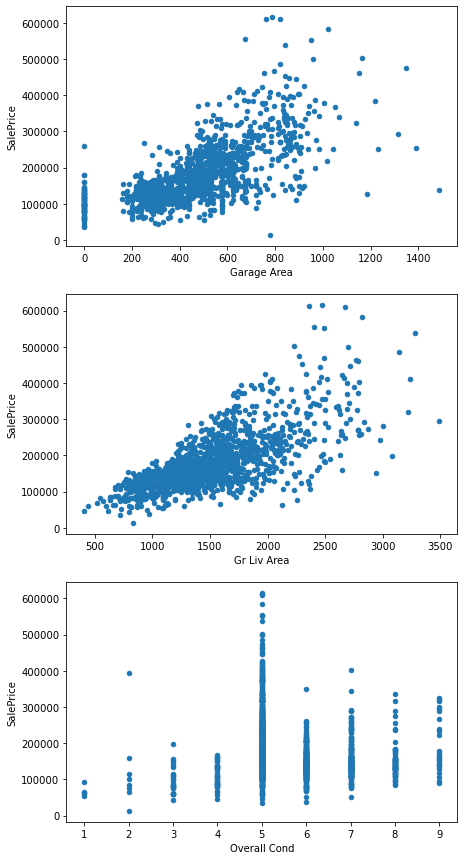

In [3]:
fig = plt.figure(figsize=(7,15))
#From these columns, we can graph the scatter plot 
columns = ['Garage Area','Gr Liv Area','Overall Cond']

for i in range(3):
    axp = fig.add_subplot(3, 1, i+1)
    train.plot(x=columns[i], y=target, ax=axp, kind="scatter")
    
plt.show()

In [4]:
#By looking at the correlations, we see that the correlation between SalePrice and Gr Liv Area
correlations = train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()
print(correlations)

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


In [5]:
lr = LinearRegression()
#This is the regression on the data using the columns
lr.fit(train[['Gr Liv Area']], train[target])

#y = a0x + a1

#this is the slope
a0 = lr.intercept_
print(a0)
#this is the y-intercept
a1 = lr.coef_
print(a1)



5366.821710056014
[116.86624683]


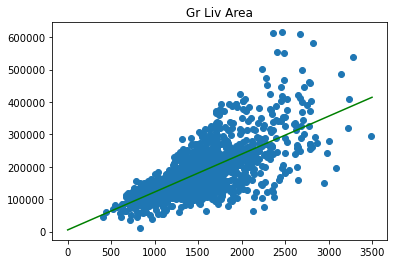

In [6]:
def draw_regression():
    #Linear regression 
    x = np.linspace(0,3500,100)
    y = a0 + a1*x
    plt.plot(x,y,c="green")    
    #Scatter plot
    x = train['Gr Liv Area']
    y = train[target]
    plt.scatter(x,y)
    plt.title("Gr Liv Area")
    plt.show()
    
#We see the line of best fit on the scatter plot
draw_regression()

In [7]:
lr = LinearRegression()

#Model using just one column
lr.fit(train[['Gr Liv Area']], train[target])

#This is the training using the linear regression
train_predictions = lr.predict(train[['Gr Liv Area']])
#This is the testing of the linear regression
test_predictions = lr.predict(test[['Gr Liv Area']])

#This is the mse of the train using the model column GR Liv Area and the target column SalePrice
train_mse = mean_squared_error(train_predictions, train[target])
#This is the mse of the testusing the model column GR Liv Area and the target column SalePrice
test_mse = mean_squared_error(test_predictions, test[target])

#This is the rmse of the train set
train_rmse = np.sqrt(train_mse)
#This is the rmse of the test set
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


In [8]:
cols = ['Overall Cond', 'Gr Liv Area']

#Using a model with two columns
lr.fit(train[cols], train[target])

#Using the predictions for the train and the test
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

#Finding the rmse of the train and test
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train[target]))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test[target]))

print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


In [9]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460].copy()
test = data[1460:].copy()
#This are some columns that are going to be dropped, given that they are not representative
drop_columns = ["PID","Year Built","Year Remod/Add","Garage Yr Blt","Mo Sold","Yr Sold"]
#When including the dtypes, the complete name should be used
numerical_train = train.select_dtypes(include=['int64','float64'])
#When droping the columns, the axis=1 represent columns
numerical_train = numerical_train.drop(drop_columns,axis = 1)
# print(numerical_train.info())
null_series = numerical_train.isnull().sum()
# print(null_series)
#using the mask to keep the ones where null_series = 0
full_cols_series = null_series[null_series==0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


In [10]:
#The train subset is the subset with the columns that are required
train_subset = train[full_cols_series.index]
#This is the correlation matrix of all the columns left
corrmat = train_subset.corr()
#We selected only the column required and the values are sorted
sorted_corrs = corrmat[target].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

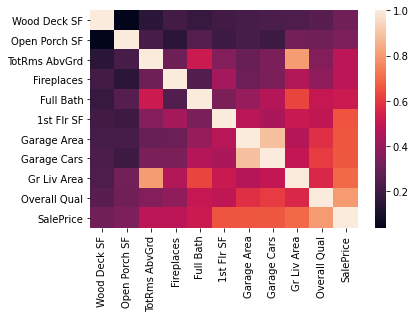

In [11]:
#Only the columns that have a correlation > 0.3 are kept
strong_corrs = sorted_corrs[sorted_corrs>0.3]
#correlation matrix using those columns
corrmat = train_subset[strong_corrs.index].corr()
#Printed the heat map of the correlations
sns.heatmap(corrmat)

In [12]:
#Garage Area is basically the same as Garage Cars
#Gr Liv Area is basically the same as TotRms AbvGrd
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

In [13]:
clean_test = test[final_corr_cols.index]
clean_test.dropna()
print(clean_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB
None


In [14]:
#Droping the target column from the final correlation columns, for the training model
features = final_corr_cols.drop([target]).index
#cleaning the data set, dropping rows with missing values
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train[target])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41032.026120197654


In [15]:
#A good way to compare columns, is to rescale, where the max value should be 1 and the min value should be 0

unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(unit_train.min())
print(unit_train.max())
# Confirmed: the min and max values are 0.0 and 1.0 respectively

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


In [16]:
print(unit_train.var())

Wood Deck SF     0.033064
Open Porch SF    0.013938
Fireplaces       0.046589
Full Bath        0.018621
1st Flr SF       0.025814
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
dtype: float64


In [17]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop(['Open Porch SF'])

lr = LinearRegression()
lr.fit(train[features], train[target])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.69670778396
40591.42702437725


In [18]:
#MSE = 1/n \Sigma (a1x - y)^2
#we use the approximation y = a1x, as the first approximation


#the derivative with respect of a1 is:
#MSE' - 1/n \Sigma 2(a1x - y)x
def derivative(a1, xi_list, yi_list):
    n = len(xi_list)
    sumMSE = 0
    for i in range(0, n):
        sumMSE += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = 2*sumMSE/n
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]
print(param_iterations)

[150, 106.24258269493151, 126.61281661731272, 117.12993450021699, 121.54446668425497, 119.48938531096931, 120.44607998998796, 120.00071333893449, 120.20804328256295, 120.11152571569237, 120.15645719327628, 120.13554040327286, 120.1452777216869, 120.14074474268385, 120.14285496418101, 120.14187260031741, 120.14232991665213, 120.142117023815, 120.14221613105579, 120.14216999401657, 120.14219147202738]


In [19]:
#MSE = 1/n \Sigma (a0 + a1x - y)^2
#we use the approximation y = a0 + a1x, as the next approximation

def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

# Uncomment when ready.
a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)
print("a0 = {0}, a1 = {1}".format(a0_params[-1], a1_params[-1]))

a0 = a0_params[-1]
a1 = a1_params[-1]

a0 = 999.986114052572, a1 = 119.53179462379771


999.986114052572
119.53179462379771


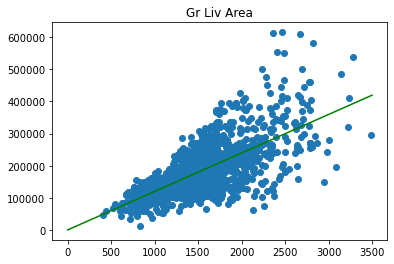

In [20]:
def draw_regression():
    #Linear regression 
    x = np.linspace(0,3500,100)
    y = a0 + a1*x
    print(a0)
    print(a1)
    plt.plot(x,y,c="green")    
    #Scatter plot
    x = train['Gr Liv Area']
    y = train[target]
    plt.scatter(x,y)
    plt.title("Gr Liv Area")
    plt.show()
    
#We see the line of best fit on the scatter plot
draw_regression()